In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
import tensorflow as tf
from tensorflow import keras

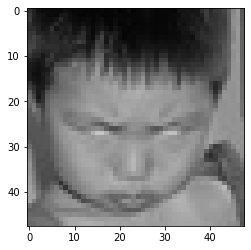

In [2]:
img = cv2.imread('Dataset/train/angry/Training_10118481.jpg')
plt.imshow(img)

In [3]:
data_dir = '.\\Dataset\\train'

In [4]:
import pathlib

data_dir = pathlib.Path(data_dir)
data_dir

WindowsPath('Dataset/train')

In [5]:
all_images = list(data_dir.glob('*/*jpg'))

In [6]:
len(all_images)

28709

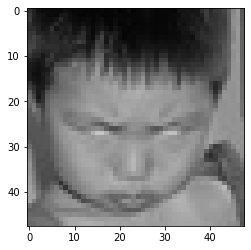

In [7]:
plt.imshow(cv2.imread(str(all_images[0])))

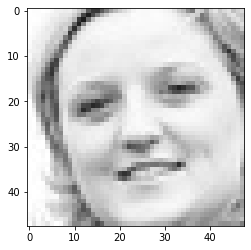

In [8]:
plt.imshow(cv2.imread(str(all_images[10000])))

In [9]:
angry = list(data_dir.glob('angry/*'))
len(angry)

3995

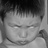

In [10]:
import PIL
PIL.Image.open(str(angry[0]))

In [11]:
emotion_dict = {
    'angry' : list(data_dir.glob('angry/*.jpg')),
    'disgust' : list(data_dir.glob('disgust/*.jpg')),
    'fear' : list(data_dir.glob('fear/*.jpg')),
    'happy' : list(data_dir.glob('happy/*.jpg')),
    'neutral' : list(data_dir.glob('neutral/*.jpg')),
    'sad' : list(data_dir.glob('sad/*.jpg')),
    'surprise' : list(data_dir.glob('surprise/*.jpg'))
}

In [12]:
emotion_label = {
    'angry' : 0,
    'disgust' : 1,
    'fear' : 2,
    'happy' : 3,
    'neutral' : 4,
    'sad' : 5,
    'surprise' : 6
}

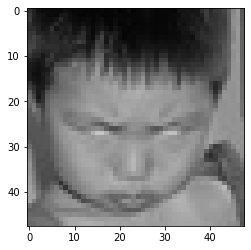

In [13]:
angry_img = cv2.imread(str(emotion_dict['angry'][0]))
plt.imshow(angry_img)

In [14]:
x_train = []
y_train = []
for emotion,emotion_img in emotion_dict.items():
    for image in emotion_img:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(60,60))
        x_train.append(resized_img)
        y_train.append(emotion_label[emotion])

In [15]:
x_train = np.array(x_train)
y_train = np.array(y_train)

In [16]:
x_train_scaled = x_train / 255

In [17]:
data_dir = '.\\Dataset\\test'

In [18]:
data_dir = pathlib.Path(data_dir)
data_dir

WindowsPath('Dataset/test')

In [19]:
all_test_images = list(data_dir.glob('*/*jpg'))

In [20]:
len(all_test_images)

7178

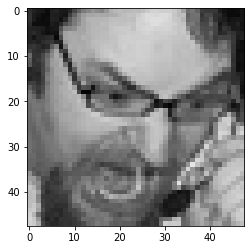

In [21]:
plt.imshow(cv2.imread(str(all_test_images[0])))

In [22]:
emotion_dict_test = {
    'angry' : list(data_dir.glob('angry/*.jpg')),
    'disgust' : list(data_dir.glob('disgust/*.jpg')),
    'fear' : list(data_dir.glob('fear/*.jpg')),
    'happy' : list(data_dir.glob('happy/*.jpg')),
    'neutral' : list(data_dir.glob('neutral/*.jpg')),
    'sad' : list(data_dir.glob('sad/*.jpg')),
    'surprise' : list(data_dir.glob('surprise/*.jpg'))
}

In [23]:
emotion_label = {
    'angry' : 0,
    'disgust' : 1,
    'fear' : 2,
    'happy' : 3,
    'neutral' : 4,
    'sad' : 5,
    'surprise' : 6
}

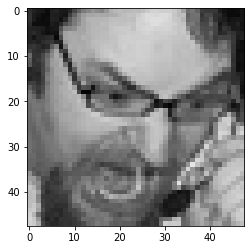

In [24]:
angry_img = cv2.imread(str(emotion_dict_test['angry'][0]))
plt.imshow(angry_img)

In [25]:
x_test = []
y_test = []
for emotion,emotion_img in emotion_dict_test.items():
    for image in emotion_img:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(60,60))
        x_test.append(resized_img)
        y_test.append(emotion_label[emotion])

In [26]:
x_test = np.array(x_test)
y_test = np.array(y_test)

In [27]:
x_test_scaled = x_test / 255

In [28]:
x_train_scaled.shape

(28709, 60, 60, 3)

In [29]:
x_test_scaled.shape

(7178, 60, 60, 3)

In [30]:
model = keras.Sequential([
    keras.layers.Conv2D(32, 3, padding='same', activation='relu',input_shape = (60,60,3)),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(128, 3, padding='same', activation='relu'),
    keras.layers.MaxPooling2D(),
    
    keras.layers.Flatten(),
    keras.layers.Dense(1000, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(7,activation='softmax')
])

model.compile(optimizer='adam',
              loss = 'SparseCategoricalCrossentropy',
              metrics=['accuracy'])
              

In [31]:
model.fit(x_train_scaled,y_train , epochs = 30)

Epoch 1/30
898/898 [==============================] - 60s 66ms/step - loss: 1.6911 - accuracy: 0.3238
Epoch 2/30
898/898 [==============================] - 60s 67ms/step - loss: 1.4506 - accuracy: 0.4422
Epoch 3/30
898/898 [==============================] - 62s 70ms/step - loss: 1.3261 - accuracy: 0.4907
Epoch 4/30
898/898 [==============================] - 77s 85ms/step - loss: 1.2328 - accuracy: 0.5339
Epoch 5/30
898/898 [==============================] - 68s 76ms/step - loss: 1.1452 - accuracy: 0.5637
Epoch 6/30
898/898 [==============================] - 64s 71ms/step - loss: 1.0548 - accuracy: 0.6008
Epoch 7/30
898/898 [==============================] - 65s 73ms/step - loss: 0.9616 - accuracy: 0.6424
Epoch 8/30
898/898 [==============================] - 65s 73ms/step - loss: 0.8717 - accuracy: 0.6771
Epoch 9/30
898/898 [==============================] - 64s 72ms/step - loss: 0.7743 - accuracy: 0.7127
Epoch 10/30
898/898 [==============================] - 67s 75ms/step - loss: 0.690

In [32]:
model.evaluate(x_test_scaled,y_test)

225/225 [==============================] - 4s 16ms/step - loss: 2.2716 - accuracy: 0.5646


[2.2716023921966553, 0.5646419525146484]

In [33]:
y_predicted = model.predict(x_test_scaled)

225/225 [==============================] - 4s 15ms/step


In [34]:
y_pred = []
for i in y_predicted:
    y_pred.append(np.argmax(i))

In [35]:
y_pred[10:20]

[0, 4, 5, 4, 4, 0, 0, 0, 2, 4]

In [36]:
y_test[10:20]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [37]:
len(emotion_dict['angry'])

3995

In [38]:
len(emotion_dict['disgust'])

436

In [39]:
len(emotion_dict['fear'])

4097

In [40]:
len(emotion_dict['happy'])

7215

In [41]:
len(emotion_dict['neutral'])

4965

In [42]:
len(emotion_dict['sad'])

4830

In [43]:
len(emotion_dict['surprise'])

3171

In [44]:
import random

In [45]:
angry = random.choices(emotion_dict['angry'], k = 3000)
disgust = random.choices(emotion_dict['disgust'], k = 3000)
fear = random.choices(emotion_dict['fear'], k = 3000)
happy = random.choices(emotion_dict['happy'], k = 3000)
neutral = random.choices(emotion_dict['neutral'], k = 3000)
sad = random.choices(emotion_dict['sad'], k = 3000)
surprise = random.choices(emotion_dict['surprise'], k = 3000)

In [46]:
x_train_new = []
y_train_new = []

In [47]:
def training_data(x_train_new,y_train_new,z,string):
    for img_location in z:
        img = cv2.imread(str(img_location))
        resized_img = cv2.resize(img,(60,60))
        x_train_new.append(resized_img)
        y_train_new.append(emotion_label[string])

In [48]:
training_data(x_train_new,y_train_new,angry,"angry")
training_data(x_train_new,y_train_new,disgust,"disgust")
training_data(x_train_new,y_train_new,fear,"fear")
training_data(x_train_new,y_train_new,happy,"happy")
training_data(x_train_new,y_train_new,neutral,"neutral")
training_data(x_train_new,y_train_new,sad,"sad")
training_data(x_train_new,y_train_new,surprise,"surprise")

In [49]:
x_train_new = np.array(x_train_new)
y_train_new = np.array(y_train_new)

In [50]:
x_train_scaled_new = x_train_new / 255

In [51]:
x_train_scaled_new

array([[[[0.75294118, 0.75294118, 0.75294118],
         [0.7254902 , 0.7254902 , 0.7254902 ],
         [0.69019608, 0.69019608, 0.69019608],
         ...,
         [0.61960784, 0.61960784, 0.61960784],
         [0.63921569, 0.63921569, 0.63921569],
         [0.65490196, 0.65490196, 0.65490196]],

        [[0.7372549 , 0.7372549 , 0.7372549 ],
         [0.7254902 , 0.7254902 , 0.7254902 ],
         [0.70196078, 0.70196078, 0.70196078],
         ...,
         [0.60784314, 0.60784314, 0.60784314],
         [0.62745098, 0.62745098, 0.62745098],
         [0.65098039, 0.65098039, 0.65098039]],

        [[0.7372549 , 0.7372549 , 0.7372549 ],
         [0.72941176, 0.72941176, 0.72941176],
         [0.70980392, 0.70980392, 0.70980392],
         ...,
         [0.58431373, 0.58431373, 0.58431373],
         [0.60784314, 0.60784314, 0.60784314],
         [0.63529412, 0.63529412, 0.63529412]],

        ...,

        [[0.36862745, 0.36862745, 0.36862745],
         [0.32941176, 0.32941176, 0.32941176]

In [52]:
model_1 = keras.Sequential([
    keras.layers.Conv2D(32, 3, padding='same', activation='relu',input_shape = (60,60,3)),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(128, 3, padding='same', activation='relu'),
    keras.layers.MaxPooling2D(),
    
    keras.layers.Flatten(),
    keras.layers.Dense(1000, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(7,activation='softmax')
])

model_1.compile(optimizer='adam',
              loss = 'SparseCategoricalCrossentropy',
              metrics=['accuracy'])

In [53]:
model_1.fit(x_train_scaled_new,y_train_new , epochs = 30)

Epoch 1/30
657/657 [==============================] - 47s 70ms/step - loss: 1.8237 - accuracy: 0.2548
Epoch 2/30
657/657 [==============================] - 46s 70ms/step - loss: 1.5137 - accuracy: 0.4217
Epoch 3/30
657/657 [==============================] - 46s 70ms/step - loss: 1.2394 - accuracy: 0.5321
Epoch 4/30
657/657 [==============================] - 46s 69ms/step - loss: 1.0467 - accuracy: 0.6117
Epoch 5/30
657/657 [==============================] - 46s 70ms/step - loss: 0.8723 - accuracy: 0.6804
Epoch 6/30
657/657 [==============================] - 45s 69ms/step - loss: 0.7053 - accuracy: 0.7469
Epoch 7/30
657/657 [==============================] - 47s 72ms/step - loss: 0.5646 - accuracy: 0.8010
Epoch 8/30
657/657 [==============================] - 46s 70ms/step - loss: 0.4504 - accuracy: 0.8399
Epoch 9/30
657/657 [==============================] - 46s 69ms/step - loss: 0.3700 - accuracy: 0.8713
Epoch 10/30
657/657 [==============================] - 45s 69ms/step - loss: 0.321

In [54]:
model_1.evaluate(x_test_scaled,y_test)

225/225 [==============================] - 4s 16ms/step - loss: 3.0445 - accuracy: 0.4848


[3.044501781463623, 0.48481470346450806]

In [55]:
model.save('saved_model')

INFO:tensorflow:Assets written to: saved_model\assets


INFO:tensorflow:Assets written to: saved_model\assets


In [56]:
import joblib
joblib.dump(model,'saved_model.pkl')

INFO:tensorflow:Assets written to: ram://d800c8ab-3979-410f-8b4a-87bd012d7655/assets


INFO:tensorflow:Assets written to: ram://d800c8ab-3979-410f-8b4a-87bd012d7655/assets


['saved_model.pkl']

In [57]:
import json
with open('emotion_label.jason','w') as f:
    f.write(json.dumps(emotion_label))

In [58]:
model.save('save_model')

INFO:tensorflow:Assets written to: save_model\assets


INFO:tensorflow:Assets written to: save_model\assets
